In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt  

In [2]:
RANDOM_SEED = 42

In [3]:
train_df = pd.read_csv('Real estate.csv')
test_df = pd.read_csv('test.csv')

## data understanding, visualization and minor mining

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      382 non-null    int64  
 1   X1 transaction date                     382 non-null    float64
 2   X2 house age                            382 non-null    float64
 3   X3 distance to the nearest MRT station  382 non-null    float64
 4   X4 number of convenience stores         382 non-null    int64  
 5   X5 latitude                             382 non-null    float64
 6   X6 longitude                            382 non-null    float64
 7   Y house price of unit area              382 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 24.0 KB


In [5]:
train_df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
train_df.drop(columns=['X1 transaction date','X5 latitude','X6 longitude','No'],inplace=True)
test_df.drop(columns=['X1 transaction date','X5 latitude','X6 longitude','No'],inplace=True)

#removing non-important columns

<AxesSubplot:>

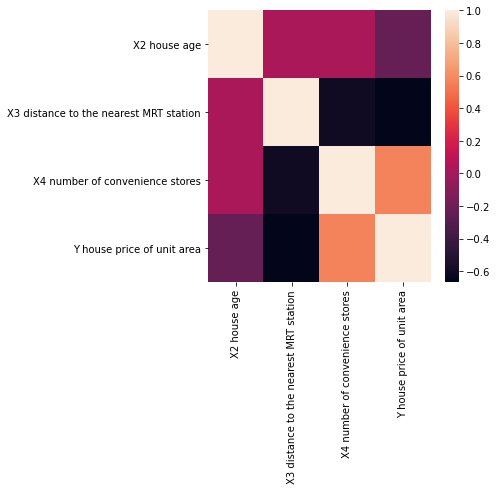

In [7]:
plt.figure(figsize=(5,5))
sns.heatmap(train_df.corr())

<AxesSubplot:xlabel='X2 house age', ylabel='Y house price of unit area'>

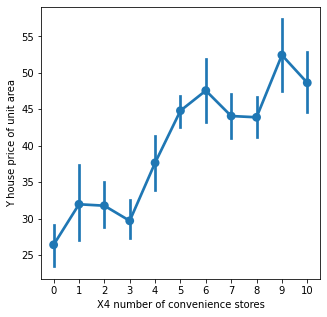

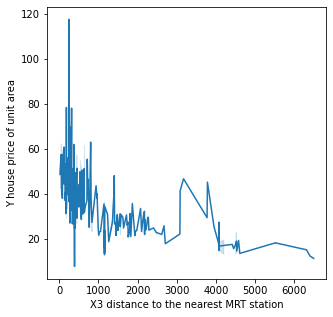

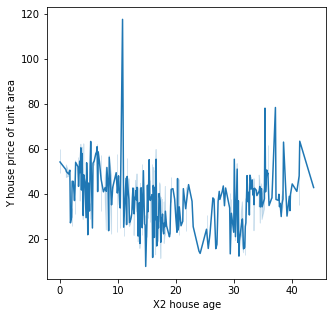

In [8]:
plt.figure(figsize=(5,5))
sns.pointplot(x=train_df['X4 number of convenience stores'],y=train_df['Y house price of unit area'],data=train_df)
plt.figure(figsize=(5,5))
sns.lineplot(x=train_df['X3 distance to the nearest MRT station'],y=train_df['Y house price of unit area'],data=train_df)
plt.figure(figsize=(5,5))
sns.lineplot(x=train_df['X2 house age'],y=train_df['Y house price of unit area'],data=train_df)


#data visualization for better understanding of dataset

<AxesSubplot:>

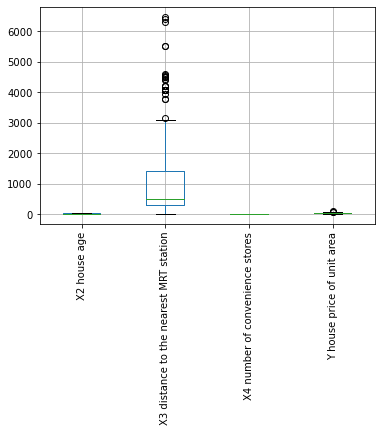

In [9]:
train_df.boxplot(rot=90)

#this box plot shows that one column have outliers

In [10]:
x = train_df.drop('Y house price of unit area',axis=1)
y = train_df['Y house price of unit area'].values

#dividing the dataset in features and target variable

In [11]:
x_test = test_df.drop('Y house price of unit area',axis=1)
y_test = test_df['Y house price of unit area'].values

#preparing the testing datatset

In [12]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler

In [13]:
rc_1 = RobustScaler()
rc_2 = MinMaxScaler()

x = rc_1.fit_transform(x)
x_test = rc_1.transform(x_test)

y = rc_2.fit_transform(y.reshape(-1,1))
y_test = rc_2.transform(y_test.reshape(-1,1))

#scaling the training and test dataset

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.1,random_state=RANDOM_SEED)

#spliting the train data in train and validation data

In [16]:
from sklearn.linear_model import Lasso

### designing the model (Lasso Regression)

In [67]:
models = []
model_dict = dict()

In [68]:
las = Lasso(alpha=2.0,max_iter=1000)
las.fit(x_train,y_train)

#defining the lasso regression model
models.append(las)
model_dict['las'] = "Linear Regression Model"

### Defining Ridge regeression model

In [69]:
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [70]:
rid = Ridge(alpha=20.0)
rid.fit(x_train,y_train)

#defining Ridge model 
models.append(rid)
model_dict['rid'] = 'Ridge Regression Model'

### Linear Regression Model

In [71]:
lin = LinearRegression()
lin.fit(x_train,y_train)

models.append(lin)
model_dict['lin'] = "Linear Regression Model"

### Decision Tree Classifier Model

In [72]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

models.append(dt)
model_dict['dt'] = "Decision Tree Regressor"

In [73]:
from sklearn.metrics import r2_score,max_error

In [81]:
for i,model in enumerate(models):
    y_pred = model.predict(x_test)
    print(list(model_dict.values())[i])
    print(f'The R2 Score of First Model is {r2_score(y_test,y_pred)}')
    print(f'The Max Error Score of First Model is {max_error(y_test,y_pred)}')
    print("****************")

Linear Regression Model
The R2 Score of First Model is -0.018834047974619184
The Max Error Score of First Model is 0.2693728992962061
****************
Ridge Regression Model
The R2 Score of First Model is 0.5998774064914146
The Max Error Score of First Model is 0.22967232114759184
****************
Linear Regression Model
The R2 Score of First Model is 0.592794817664507
The Max Error Score of First Model is 0.23131057576498315
****************
Decision Tree Regressor
The R2 Score of First Model is 0.5096249274393112
The Max Error Score of First Model is 0.26424021838034567
****************
